<a href="https://colab.research.google.com/github/alfazick/deeplearningLLM/blob/main/Visualising_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# gradient descent steps
# 1 Initialising parameters
# 2 Forward pass
# 3 Computing error and loss
# 4 Computing gradients
# 5 Updating parameters

# Gradient Descent Types
# a Batch Gradient Descent
# b Stochastic Gradient Descent
# c Mini-Batch Gradient Descent

In [4]:
# Model
# y = wx + b + e


In [6]:
# Synthetic data
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N,1)
epsilon = (.1 * np.random.randn(100,1))
print(x[:5])
print(epsilon[:5])

[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]
[[ 0.00870471]
 [-0.02990074]
 [ 0.00917608]
 [-0.19875689]
 [-0.02196719]]


In [8]:
y = true_b + true_w * x + epsilon
print(x[:5])
print(y[:5])

[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]
[[1.75778494]
 [2.87152788]
 [2.47316396]
 [1.99856008]
 [1.29007009]]


In [9]:
# Shuffle the indices
idx = np.arange(N)
np.random.shuffle(idx)
print(idx)

[76 83 80 98  2 77 71 84 89 50 40 51 67 86 37 49  4 10 69 81  9 54 55 87
 64 44 90 75 33 30 93 95 14 61 11 13 15  7  0 19 35  6 12 65 70 88 56 58
 28 38 91 42  8 73 39 85 25 92 41 26  1 22 21 46 74 79 78 72 57 53 24 17
 66 32 31 62 59 52 82 23 36  5 45 99 43 16 48 94 34  3 18 47 60 68 63 27
 96 29 20 97]


In [11]:
train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8):]
print(train_idx)
print(val_idx)

[76 83 80 98  2 77 71 84 89 50 40 51 67 86 37 49  4 10 69 81  9 54 55 87
 64 44 90 75 33 30 93 95 14 61 11 13 15  7  0 19 35  6 12 65 70 88 56 58
 28 38 91 42  8 73 39 85 25 92 41 26  1 22 21 46 74 79 78 72 57 53 24 17
 66 32 31 62 59 52 82 23]
[36  5 45 99 43 16 48 94 34  3 18 47 60 68 63 27 96 29 20 97]


In [12]:
x_train,y_train = x[train_idx], y[train_idx]
x_val,y_val = x[val_idx],y[val_idx]

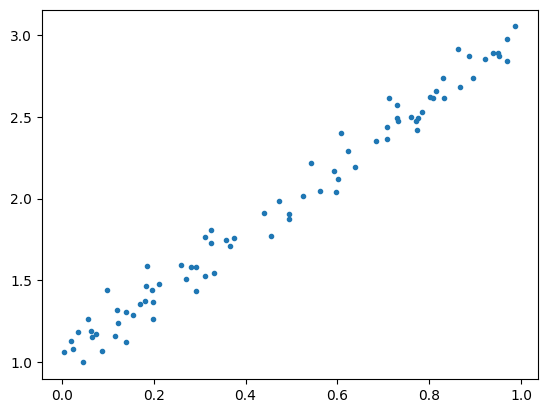

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_train,y_train,'.')

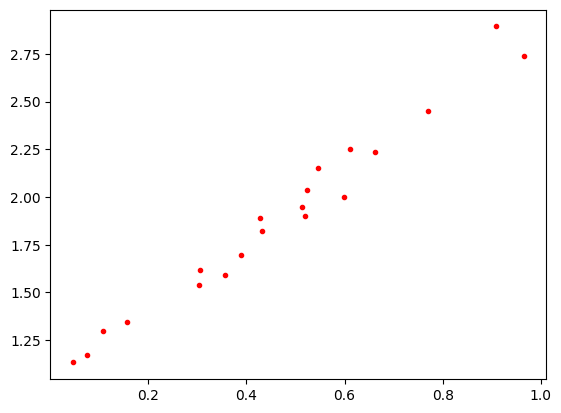

In [15]:
plt.plot(x_val,y_val,'.',color='red')

In [16]:
# true values b = 1 and w = 2, use gradient descent to obtain  original values

In [17]:
# Step 0 : Random initialization

b = np.random.randn(1)
w = np.random.randn(1)

print(b,w)

[-2.02514259] [0.18645431]


In [18]:
# Step 1 : Compute model's prediction | Forward pass
yhat = b + w*x_train
print(yhat[:5])


[[-1.8813359 ]
 [-2.01329186]
 [-1.86421323]
 [-2.02040308]
 [-1.88865916]]


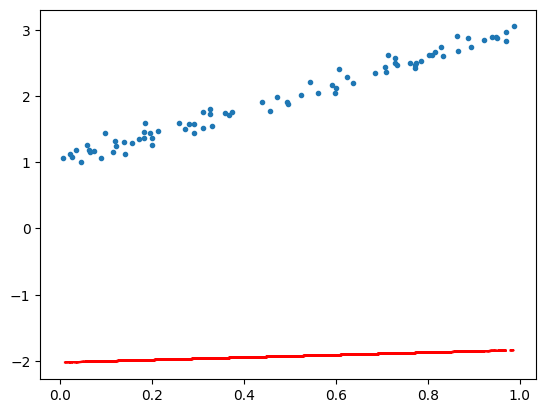

In [29]:
plt.plot(x_train,y_train,'.')
plt.plot(x_train,yhat,linestyle='--',color='red')


In [30]:
print(b,w)

[-2.02514259] [0.18645431]


In [31]:
# Step 2: Computing the loss

# 1) all points, batch gradient
# 2) single point, stochastic gradient
# 3) n points out of N, mini-batch gradient


In [33]:
error = y_train - yhat
loss = (error**2).mean()
print("Loss calculated as Mean Squarred Error-MSE ",loss)

Loss calculated as Mean Squarred Error-MSE  15.444680120636235


In [34]:
arr = np.array([12,12,1,1])
mse = np.mean(arr**2)
print(mse)

72.5


In [35]:
# Loss surface. Look at combinations of w an b
b_range = np.linspace(true_b-3, true_b+3, 101)
w_range = np.linspace(true_w-3, true_w+3, 101)

bs,ws = np.meshgrid(b_range, w_range)

print(bs.shape)
print(ws.shape)

(101, 101)
(101, 101)


In [36]:
dummy_x = x_train[0]
dummy_y_hat = bs + ws *dummy_x
print(dummy_y_hat.shape)

(101, 101)


In [37]:
all_predictions = np.apply_along_axis(
    func1d = lambda x:bs+ws*x,
    axis = 1,
    arr=x_train
)

print(all_predictions.shape)

(80, 101, 101)


In [41]:
all_labels = y_train.reshape(-1,1,1)
print(all_labels.shape)

(80, 1, 1)


In [43]:
all_errors = (all_predictions - all_labels)
print(all_errors.shape)

(80, 101, 101)


In [44]:
all_losses = (all_errors**2).mean(axis=0)
print(all_losses.shape)

(101, 101)


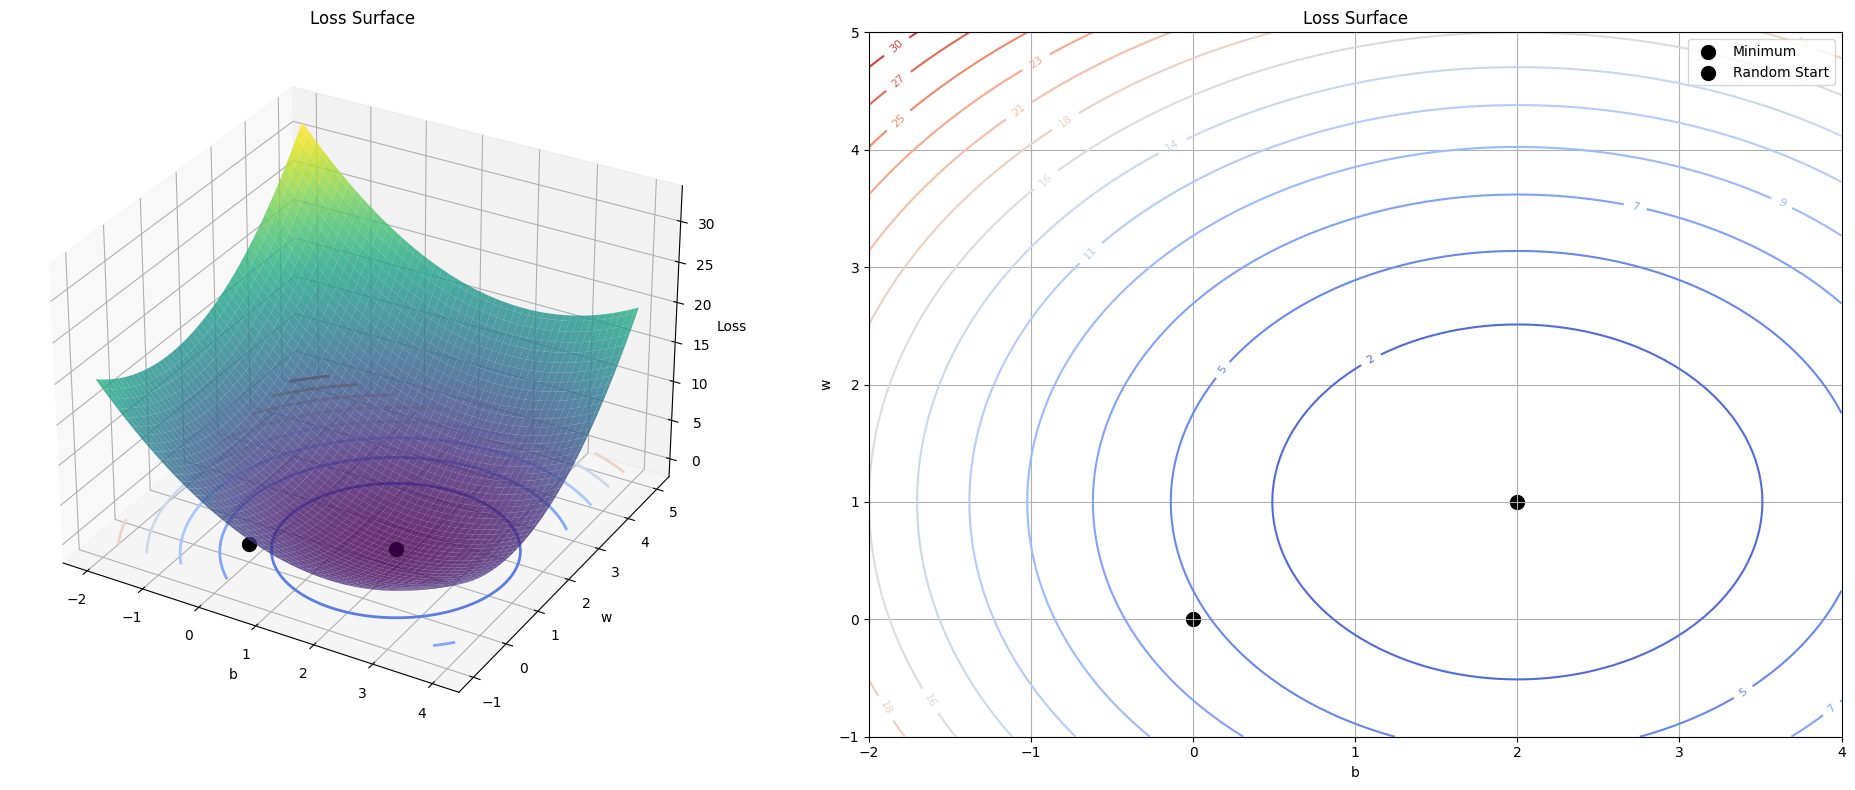

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_stylized_loss_surface(errors, min_point=(2, 2), random_start=(0, 0)):
    """
    Create a stylized loss surface visualization with both 3D surface and contour plots

    Parameters:
    errors: The error values
    min_point: The coordinates of the minimum point (b, w)
    random_start: The coordinates of the random start point (b, w)
    """
    # Create figure with two subplots
    fig = plt.figure(figsize=(20, 8))

    # Create meshgrid for visualization
    b = np.linspace(-2, 4, 100)
    w = np.linspace(-1, 5, 100)
    B, W = np.meshgrid(b, w)

    # Create loss surface (using a simplified quadratic loss for demonstration)
    Z = (B - min_point[0])**2 + (W - min_point[1])**2

    # 3D Surface Plot
    ax1 = fig.add_subplot(121, projection='3d')

    # Plot the surface
    surf = ax1.plot_surface(B, W, Z, cmap='viridis', alpha=0.8,
                           linewidth=0, antialiased=True)

    # Customize the 3D plot
    ax1.set_xlabel('b')
    ax1.set_ylabel('w')
    ax1.set_zlabel('Loss')
    ax1.set_title('Loss Surface')

    # Add contour lines on the surface
    offset = Z.min()
    levels = np.linspace(Z.min(), Z.max(), 10)
    ax1.contour(B, W, Z, levels, offset=offset, cmap='coolwarm', linewidths=2)

    # Mark the minimum and random start points
    ax1.scatter([min_point[0]], [min_point[1]], [offset], color='black', s=100, label='Minimum')
    ax1.scatter([random_start[0]], [random_start[1]], [offset], color='black', s=100, label='Random Start')

    # Contour Plot
    ax2 = fig.add_subplot(122)

    # Create contour plot
    levels = np.linspace(Z.min(), Z.max(), 15)
    contour = ax2.contour(B, W, Z, levels=levels, cmap='coolwarm')

    # Add labels to contour lines
    ax2.clabel(contour, inline=True, fontsize=8, fmt='%.0f')

    # Mark the minimum and random start points
    ax2.scatter([min_point[0]], [min_point[1]], color='black', s=100, label='Minimum')
    ax2.scatter([random_start[0]], [random_start[1]], color='black', s=100, label='Random Start')

    # Customize the contour plot
    ax2.set_xlabel('b')
    ax2.set_ylabel('w')
    ax2.set_title('Loss Surface')
    ax2.grid(True)

    # Add legend
    ax2.legend()

    plt.tight_layout()
    return fig

# Create the visualization
min_point = (2, 1)  # Location of minimum
random_start = (0, 0)  # Random start point

fig = plot_stylized_loss_surface(all_errors, min_point=min_point, random_start=random_start)
plt.show()